# Dataset 4 - Boston

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../src')
warnings.filterwarnings('ignore')

In [2]:
import train_test
import ABC_train_test
import bostonDataset
import baselineModels
import network
import statsModel
import performanceMetrics
import dataset
import sanityChecks
import torch 
import matplotlib.pyplot as plt 
import seaborn as sns 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Parameters

General Parameters 

1. Number of Samples
2. Number of features 

ABC-Generator parameters are as mentioned below: 
1. mean : 1 ($\beta \sim N(\beta^{*},\sigma)$ where $\beta^{*}$ are coefficients of statistical model) or 1 ($\beta \sim N(0,\sigma)$
2. std : $\sigma = 1, 0.1 , 0.01$ (standard deviation)

In [3]:
n_features = 13
n_samples= 506
n_target = 1 
 
#ABC Generator Parameters
mean = 1 
variance = 0.01

#Hyper-parameters 
n_epochs = 100

In [4]:
# Parameters
mean = 1
variance = 1
n_epochs = 1000


## Dataset

In [5]:
X,Y = bostonDataset.boston_data()

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.735
Model:                            OLS   Adj. R-squared (uncentered):              0.726
Method:                 Least Squares   F-statistic:                              83.24
Date:                Sat, 27 Nov 2021   Prob (F-statistic):                   6.75e-104
Time:                        11:59:40   Log-Likelihood:                         -301.59
No. Observations:                 404   AIC:                                      629.2
Df Residuals:                     391   BIC:                                      681.2
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

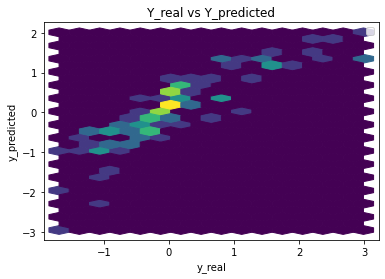

Performance Metrics
Mean Squared Error: 0.2615613410288017
Mean Absolute Error: 0.38149745453026074
Manhattan distance: 38.912740362086595
Euclidean distance: 5.165196684051613


In [7]:
[coeff,y_pred] = statsModel.statsModel(X,Y)

## Random Forest

In [8]:
mse_rf = baselineModels.randomForest(X_train,y_train,X_test,y_test)

Mean Squared error 0.13652700282050556


## Catboost

In [9]:
mse_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)

Learning rate set to 0.03548
0:	learn: 0.9976936	total: 160ms	remaining: 2m 40s
1:	learn: 0.9757694	total: 162ms	remaining: 1m 20s
2:	learn: 0.9558748	total: 164ms	remaining: 54.5s


3:	learn: 0.9388601	total: 166ms	remaining: 41.4s
4:	learn: 0.9179410	total: 168ms	remaining: 33.5s
5:	learn: 0.9017384	total: 170ms	remaining: 28.2s
6:	learn: 0.8842832	total: 172ms	remaining: 24.4s
7:	learn: 0.8659629	total: 174ms	remaining: 21.6s
8:	learn: 0.8502317	total: 176ms	remaining: 19.4s
9:	learn: 0.8331299	total: 178ms	remaining: 17.6s
10:	learn: 0.8173387	total: 179ms	remaining: 16.1s
11:	learn: 0.8023940	total: 181ms	remaining: 14.9s
12:	learn: 0.7869303	total: 183ms	remaining: 13.9s
13:	learn: 0.7713680	total: 185ms	remaining: 13s
14:	learn: 0.7584181	total: 186ms	remaining: 12.2s
15:	learn: 0.7436494	total: 188ms	remaining: 11.6s
16:	learn: 0.7301407	total: 190ms	remaining: 11s
17:	learn: 0.7168504	total: 192ms	remaining: 10.5s
18:	learn: 0.7040512	total: 194ms	remaining: 10s
19:	learn: 0.6908369	total: 196ms	remaining: 9.58s
20:	learn: 0.6759829	total: 197ms	remaining: 9.2s
21:	learn: 0.6657283	total: 199ms	remaining: 8.85s
22:	learn: 0.6553500	total: 201ms	remaining: 

100:	learn: 0.3019985	total: 338ms	remaining: 3s
101:	learn: 0.3002954	total: 339ms	remaining: 2.98s
102:	learn: 0.2988880	total: 341ms	remaining: 2.96s
103:	learn: 0.2970911	total: 342ms	remaining: 2.95s
104:	learn: 0.2956894	total: 344ms	remaining: 2.93s
105:	learn: 0.2938140	total: 345ms	remaining: 2.91s
106:	learn: 0.2921037	total: 347ms	remaining: 2.89s
107:	learn: 0.2907712	total: 348ms	remaining: 2.87s
108:	learn: 0.2897337	total: 350ms	remaining: 2.86s
109:	learn: 0.2886051	total: 351ms	remaining: 2.84s
110:	learn: 0.2873481	total: 352ms	remaining: 2.82s
111:	learn: 0.2861692	total: 354ms	remaining: 2.81s
112:	learn: 0.2843057	total: 355ms	remaining: 2.79s
113:	learn: 0.2832954	total: 357ms	remaining: 2.77s
114:	learn: 0.2819798	total: 359ms	remaining: 2.76s
115:	learn: 0.2806082	total: 360ms	remaining: 2.74s
116:	learn: 0.2793906	total: 361ms	remaining: 2.73s
117:	learn: 0.2777611	total: 363ms	remaining: 2.71s
118:	learn: 0.2765519	total: 364ms	remaining: 2.7s
119:	learn: 0.27

205:	learn: 0.2084148	total: 512ms	remaining: 1.97s
206:	learn: 0.2077789	total: 514ms	remaining: 1.97s
207:	learn: 0.2072413	total: 515ms	remaining: 1.96s
208:	learn: 0.2062438	total: 517ms	remaining: 1.96s
209:	learn: 0.2058744	total: 518ms	remaining: 1.95s
210:	learn: 0.2052197	total: 520ms	remaining: 1.94s
211:	learn: 0.2047343	total: 521ms	remaining: 1.94s
212:	learn: 0.2042000	total: 523ms	remaining: 1.93s
213:	learn: 0.2037226	total: 524ms	remaining: 1.92s
214:	learn: 0.2029918	total: 526ms	remaining: 1.92s
215:	learn: 0.2025371	total: 527ms	remaining: 1.91s
216:	learn: 0.2017508	total: 528ms	remaining: 1.91s
217:	learn: 0.2010482	total: 530ms	remaining: 1.9s
218:	learn: 0.2006396	total: 531ms	remaining: 1.89s
219:	learn: 0.2002075	total: 533ms	remaining: 1.89s
220:	learn: 0.1996957	total: 534ms	remaining: 1.88s
221:	learn: 0.1993045	total: 536ms	remaining: 1.88s
222:	learn: 0.1990169	total: 537ms	remaining: 1.87s
223:	learn: 0.1984181	total: 539ms	remaining: 1.87s
224:	learn: 0

317:	learn: 0.1614414	total: 683ms	remaining: 1.46s
318:	learn: 0.1611698	total: 684ms	remaining: 1.46s
319:	learn: 0.1610341	total: 686ms	remaining: 1.46s
320:	learn: 0.1609353	total: 687ms	remaining: 1.45s
321:	learn: 0.1605677	total: 688ms	remaining: 1.45s
322:	learn: 0.1603375	total: 690ms	remaining: 1.45s
323:	learn: 0.1600652	total: 691ms	remaining: 1.44s
324:	learn: 0.1599241	total: 693ms	remaining: 1.44s
325:	learn: 0.1598029	total: 694ms	remaining: 1.44s
326:	learn: 0.1594124	total: 696ms	remaining: 1.43s
327:	learn: 0.1591009	total: 698ms	remaining: 1.43s
328:	learn: 0.1589708	total: 699ms	remaining: 1.43s
329:	learn: 0.1585541	total: 701ms	remaining: 1.42s
330:	learn: 0.1584613	total: 702ms	remaining: 1.42s
331:	learn: 0.1581148	total: 703ms	remaining: 1.42s
332:	learn: 0.1579001	total: 705ms	remaining: 1.41s
333:	learn: 0.1575612	total: 706ms	remaining: 1.41s
334:	learn: 0.1574361	total: 708ms	remaining: 1.41s
335:	learn: 0.1570643	total: 709ms	remaining: 1.4s
336:	learn: 0

433:	learn: 0.1314669	total: 856ms	remaining: 1.12s
434:	learn: 0.1313193	total: 858ms	remaining: 1.11s
435:	learn: 0.1310719	total: 859ms	remaining: 1.11s
436:	learn: 0.1309193	total: 861ms	remaining: 1.11s
437:	learn: 0.1305961	total: 862ms	remaining: 1.11s
438:	learn: 0.1303371	total: 864ms	remaining: 1.1s
439:	learn: 0.1300766	total: 865ms	remaining: 1.1s
440:	learn: 0.1299029	total: 867ms	remaining: 1.1s
441:	learn: 0.1296275	total: 868ms	remaining: 1.1s
442:	learn: 0.1293386	total: 870ms	remaining: 1.09s
443:	learn: 0.1292820	total: 871ms	remaining: 1.09s
444:	learn: 0.1291311	total: 873ms	remaining: 1.09s
445:	learn: 0.1286689	total: 874ms	remaining: 1.09s
446:	learn: 0.1284389	total: 876ms	remaining: 1.08s
447:	learn: 0.1281208	total: 877ms	remaining: 1.08s
448:	learn: 0.1280233	total: 879ms	remaining: 1.08s
449:	learn: 0.1276625	total: 880ms	remaining: 1.07s
450:	learn: 0.1275463	total: 882ms	remaining: 1.07s
451:	learn: 0.1274825	total: 883ms	remaining: 1.07s
452:	learn: 0.12

542:	learn: 0.1073897	total: 1.03s	remaining: 865ms
543:	learn: 0.1071186	total: 1.03s	remaining: 863ms
544:	learn: 0.1068606	total: 1.03s	remaining: 861ms
545:	learn: 0.1065479	total: 1.03s	remaining: 859ms
546:	learn: 0.1063182	total: 1.03s	remaining: 857ms
547:	learn: 0.1062581	total: 1.04s	remaining: 855ms
548:	learn: 0.1059555	total: 1.04s	remaining: 853ms
549:	learn: 0.1057943	total: 1.04s	remaining: 850ms
550:	learn: 0.1055916	total: 1.04s	remaining: 848ms
551:	learn: 0.1054074	total: 1.04s	remaining: 846ms
552:	learn: 0.1053400	total: 1.04s	remaining: 844ms
553:	learn: 0.1051461	total: 1.04s	remaining: 841ms
554:	learn: 0.1049379	total: 1.05s	remaining: 839ms
555:	learn: 0.1046913	total: 1.05s	remaining: 837ms
556:	learn: 0.1045227	total: 1.05s	remaining: 835ms
557:	learn: 0.1043084	total: 1.05s	remaining: 833ms
558:	learn: 0.1042555	total: 1.05s	remaining: 831ms
559:	learn: 0.1040443	total: 1.05s	remaining: 828ms
560:	learn: 0.1038019	total: 1.05s	remaining: 826ms
561:	learn: 

648:	learn: 0.0883763	total: 1.2s	remaining: 649ms
649:	learn: 0.0882646	total: 1.2s	remaining: 647ms
650:	learn: 0.0881157	total: 1.2s	remaining: 646ms
651:	learn: 0.0879318	total: 1.21s	remaining: 644ms
652:	learn: 0.0877687	total: 1.21s	remaining: 642ms
653:	learn: 0.0875313	total: 1.21s	remaining: 641ms
654:	learn: 0.0873343	total: 1.21s	remaining: 639ms
655:	learn: 0.0872289	total: 1.22s	remaining: 637ms
656:	learn: 0.0871229	total: 1.22s	remaining: 636ms
657:	learn: 0.0869329	total: 1.22s	remaining: 634ms
658:	learn: 0.0867240	total: 1.22s	remaining: 632ms
659:	learn: 0.0865685	total: 1.22s	remaining: 630ms
660:	learn: 0.0864256	total: 1.22s	remaining: 628ms
661:	learn: 0.0862713	total: 1.23s	remaining: 626ms
662:	learn: 0.0861664	total: 1.23s	remaining: 624ms
663:	learn: 0.0861165	total: 1.23s	remaining: 622ms
664:	learn: 0.0858899	total: 1.23s	remaining: 620ms
665:	learn: 0.0857391	total: 1.23s	remaining: 618ms
666:	learn: 0.0855882	total: 1.23s	remaining: 616ms
667:	learn: 0.0

740:	learn: 0.0751608	total: 1.37s	remaining: 478ms
741:	learn: 0.0750284	total: 1.37s	remaining: 477ms
742:	learn: 0.0749156	total: 1.37s	remaining: 475ms
743:	learn: 0.0748601	total: 1.37s	remaining: 473ms
744:	learn: 0.0748015	total: 1.38s	remaining: 471ms
745:	learn: 0.0747103	total: 1.38s	remaining: 469ms
746:	learn: 0.0745878	total: 1.38s	remaining: 467ms
747:	learn: 0.0743918	total: 1.38s	remaining: 465ms
748:	learn: 0.0742043	total: 1.38s	remaining: 463ms
749:	learn: 0.0740753	total: 1.38s	remaining: 461ms
750:	learn: 0.0739501	total: 1.39s	remaining: 459ms
751:	learn: 0.0738124	total: 1.39s	remaining: 457ms
752:	learn: 0.0736186	total: 1.39s	remaining: 456ms
753:	learn: 0.0735077	total: 1.39s	remaining: 454ms
754:	learn: 0.0734216	total: 1.39s	remaining: 452ms
755:	learn: 0.0732299	total: 1.39s	remaining: 450ms
756:	learn: 0.0730973	total: 1.4s	remaining: 448ms
757:	learn: 0.0729561	total: 1.4s	remaining: 446ms
758:	learn: 0.0728159	total: 1.4s	remaining: 444ms
759:	learn: 0.0

845:	learn: 0.0641748	total: 1.54s	remaining: 281ms
846:	learn: 0.0640290	total: 1.54s	remaining: 279ms
847:	learn: 0.0638890	total: 1.54s	remaining: 277ms
848:	learn: 0.0638349	total: 1.55s	remaining: 275ms
849:	learn: 0.0637536	total: 1.55s	remaining: 273ms
850:	learn: 0.0637411	total: 1.55s	remaining: 271ms
851:	learn: 0.0636789	total: 1.55s	remaining: 269ms
852:	learn: 0.0636155	total: 1.55s	remaining: 268ms
853:	learn: 0.0635401	total: 1.55s	remaining: 266ms
854:	learn: 0.0634584	total: 1.56s	remaining: 264ms
855:	learn: 0.0633568	total: 1.56s	remaining: 262ms
856:	learn: 0.0632736	total: 1.56s	remaining: 260ms
857:	learn: 0.0631833	total: 1.56s	remaining: 258ms
858:	learn: 0.0630795	total: 1.56s	remaining: 257ms
859:	learn: 0.0630261	total: 1.56s	remaining: 255ms
860:	learn: 0.0629710	total: 1.57s	remaining: 253ms
861:	learn: 0.0628883	total: 1.57s	remaining: 251ms
862:	learn: 0.0627246	total: 1.57s	remaining: 249ms
863:	learn: 0.0626032	total: 1.57s	remaining: 247ms
864:	learn: 

945:	learn: 0.0554060	total: 1.71s	remaining: 97.6ms
946:	learn: 0.0552995	total: 1.71s	remaining: 95.8ms
947:	learn: 0.0551644	total: 1.71s	remaining: 94ms
948:	learn: 0.0551062	total: 1.72s	remaining: 92.2ms
949:	learn: 0.0549857	total: 1.72s	remaining: 90.3ms
950:	learn: 0.0549782	total: 1.72s	remaining: 88.5ms
951:	learn: 0.0549355	total: 1.72s	remaining: 86.7ms
952:	learn: 0.0549270	total: 1.72s	remaining: 84.9ms
953:	learn: 0.0548940	total: 1.72s	remaining: 83.1ms
954:	learn: 0.0548831	total: 1.72s	remaining: 81.3ms
955:	learn: 0.0547712	total: 1.73s	remaining: 79.5ms
956:	learn: 0.0547349	total: 1.73s	remaining: 77.6ms
957:	learn: 0.0546789	total: 1.73s	remaining: 75.8ms
958:	learn: 0.0546013	total: 1.73s	remaining: 74ms
959:	learn: 0.0545230	total: 1.73s	remaining: 72.2ms
960:	learn: 0.0544184	total: 1.74s	remaining: 70.4ms
961:	learn: 0.0543253	total: 1.74s	remaining: 68.6ms
962:	learn: 0.0543019	total: 1.74s	remaining: 66.8ms
963:	learn: 0.0541940	total: 1.74s	remaining: 65ms

## Common Training Parameters (Vanilla NN & GAN & ABC_GAN) 

In [10]:
threshold_mse = mse_cb
batch_size = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Vanilla Neural Network 

In [ ]:
baselineModels.vanillaNeuralNetwork(train_data,test_data,batch_size,n_features,n_target,n_epochs)

## GAN Model

**Training GAN for n_epochs number of epochs** 

In [ ]:
generator = network.Generator(n_features+1).to(device)
discriminator = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(generator.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(discriminator.parameters(), lr=0.01, betas=(0.5, 0.999))

In [ ]:
print(generator)
print(discriminator)

In [ ]:
discLossG1,genLossG1 = train_test.training_GAN(discriminator,generator,disc_opt,gen_opt,train_data,batch_size, n_epochs,criterion,device)

In [ ]:
GAN1_metrics = train_test.test_generator(generator,test_data,device)

In [ ]:
sanityChecks.discProbVsError(real_dataset,discriminator,device)

**Training GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [ ]:
generator2 = network.Generator(n_features+1).to(device)
discriminator2 = network.Discriminator(n_features+1).to(device)
criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(generator2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(discriminator2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [ ]:
discLossG2,genLossG2 = train_test.training_GAN_2(discriminator2,generator2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,device)

In [ ]:
GAN2_metrics=train_test.test_generator_2(generator2,test_data,device)

In [ ]:
sanityChecks.discProbVsError(real_dataset,discriminator2,device)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [ ]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [ ]:
discLossA1,genLossA1 = ABC_train_test.training_GAN(disc, gen,disc_opt,gen_opt,train_data,batch_size, n_epochs,criterion,coeff,mean,variance,device)

In [ ]:
ABC_GAN1_metrics=ABC_train_test.test_generator(gen,test_data,coeff,mean,variance,device)

#### Sanity Checks 

In [ ]:
sanityChecks.discProbVsError(real_dataset,disc,device)

**Training ABC-GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [ ]:
gen2 = network.Generator(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [ ]:
discLossA2,genLossA2 = ABC_train_test.training_GAN_2(disc2,gen2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,coeff,mean,variance,device)

In [ ]:
ABC_GAN2_metrics=ABC_train_test.test_generator_2(gen2,test_data,coeff,mean,variance,device)

In [ ]:
sanityChecks.discProbVsError(real_dataset,disc2,device)

# Model Analysis

In [ ]:
performanceMetrics.modelAnalysis(GAN1_metrics,ABC_GAN1_metrics,GAN2_metrics,ABC_GAN2_metrics)

In [ ]:
performanceMetrics.plotTrainingLoss(discLossG1,genLossG1,discLossA1,genLossA1,discLossG2,genLossG2,discLossA2,genLossA2)

# ABC - GAN Model with skip connection

In [ ]:
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))

In [ ]:
discLossA3,genLossA3 = ABC_train_test.training_GAN(disc3, gen3,disc_opt,gen_opt,train_data,batch_size, n_epochs,criterion,coeff,mean,variance,device)

In [ ]:
ABC_GAN3_metrics=ABC_train_test.test_generator(gen3,test_data,coeff,mean,variance,device)

In [ ]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)

In [ ]:
performanceMetrics.modelAnalysis2(ABC_GAN3_metrics)

In [ ]:
performanceMetrics.plotTrainingLoss2(discLossA3,genLossA3)